# Clase Tutorial 3: Feature Engineering

* En 2014, el art√≠culo ["Practical Lessons from Predicting Clicks on Ads at Facebook"](https://oreil.ly/oS16J) destac√≥ que tener las features correctas es lo m√°s importante en el desarrollo de modelos de Machine Learning.
* Desde entonces, muchas empresas comprobaron que, una vez que tienen un modelo funcional, <span style="color: blue;">contar con las features adecuadas suele generar el mayor aumento en rendimiento</span>, superando t√©cnicas algor√≠tmicas avanzadas como el ajuste de hiperpar√°metros.
* Incluso las arquitecturas de modelos m√°s avanzadas pueden tener un mal desempe√±o si no utilizan un buen conjunto de features.
* Dada su importancia, una gran parte del trabajo de los ingenieros de ML consiste en desarrollar nuevas features √∫tiles.
* En esta clase, vamos a explorar t√©cnicas comunes y consideraciones importantes en la ingenier√≠a de features. Tambi√©n, vamos a dedicar una porci√≥n de la clase a un problema sutil pero devastador que afecta a muchos sistemas de ML en producci√≥n: la fuga de datos (data leakage).

## Learned Features vs. Engineered Features

#### ü§î ¬øPor qu√© es necesario preocuparse por la ingenier√≠a de features si el deep learning promete automatizar este proceso?

* Es cierto que la promesa del deep learning es que no necesitamos crear caracter√≠sticas manualmente. Por eso, el deep learning a veces se llama <span style="color: blue;">"aprendizaje de features" o "feature learning".</span>
* Muchos <span style="color: blue;">features pueden ser aprendidos y extra√≠dos autom√°ticamente por los algoritmos.</span>
* Sin embargo, todav√≠a estamos lejos del punto en el que todas las caracter√≠sticas puedan ser automatizadas. Adem√°s, hasta el momento, la mayor√≠a de las aplicaciones de ML en producci√≥n no utilizan deep learning.

> Ejemplo:

 * Queremos construir un clasificador para determinar si un comentario es spam o no.
 * Antes del deep learning, al recibir un texto, tendr√≠as que aplicar manualmente t√©cnicas cl√°sicas de procesamiento de texto como lematizaci√≥n, expansi√≥n de contracciones, eliminaci√≥n de puntuaci√≥n y pasar todo a min√∫sculas. Luego, podr√≠as querer dividir tu texto en n-gramas con valores de n de tu elecci√≥n.

 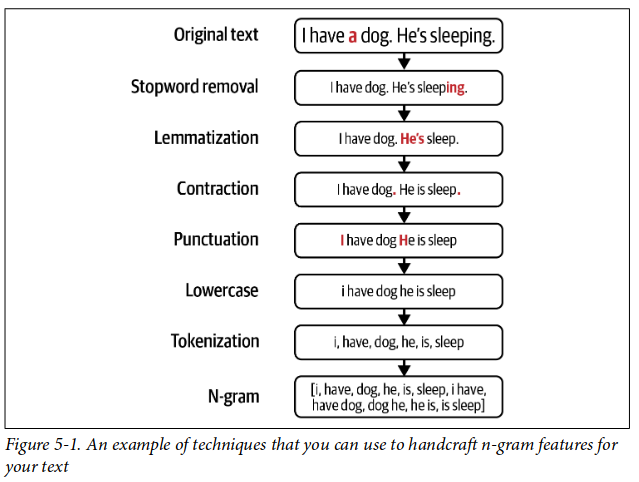

<div style="background-color: #f9f9f9; border-left: 4px solid #4CAF50; padding: 10px; font-size: 0.9em;">
<b>Definici√≥n.</b> 

<b>N-gram:</b> Secuencia contigua de n elementos de una muestra de texto dada. Los elementos pueden ser fonemas, s√≠labas, letras o palabras. 

Por ejemplo, dado el texto ‚ÄúMe gusta la comida‚Äù:
* N-gramas a nivel de palabras con n=1: ["Me", "gusta", "la", "comida"]
* N-gramas a nivel de palabras con n=2: ["Me gusta", "gusta la", "la comida"]
* Conjunto de caracter√≠sticas de n-gramas para esta oraci√≥n, si queremos n=1 y n=2, es: ["Me", "gusta", "la", "comida", "Me gusta", "gusta la", "la comida"].

</div>


 * Una vez generados n-gramas para los datos de entrenamiento, podemos crear un <span style="color: blue;">vocabulario</span> que asocie cada n-grama con un √≠ndice.
 * As√≠ podemos convertir cada <span style="color: blue;">texto en un vector basado en los √≠ndices de sus n-gramas.</span>
   * Por ejemplo, si tenemos un vocabulario de n-gramas como se muestra a continuaci√≥n:

        | me | gusta | la | comida | rica | me gusta | gusta la | la comida | comida rica |
        |----|-------|----|--------|------|----------|----------|-----------|-----------|
        | 0  |   1   |  2 |   3    |  4   |    5     |    6     |     7     |     8     | 

 * Cada elemento en el vector corresponde al n√∫mero de veces que el n-grama en ese √≠ndice aparece en el comentario.
 * ‚ÄúMe gusta la comida" ser√° codificado como el vector [1, 1, 1, 1, 0, 1, 1, 1, 0]. Este vector puede luego ser usado como entrada en un modelo de ML.


Feature engineering <span style="color: blue;">requiere conocimiento de t√©cnicas espec√≠ficas del dominio.</span>
* En el ejemplo previo, el dominio es el procesamiento de lenguaje natural (NLP) y el idioma nativo del texto. 

Feature engineering tiende a ser un <span style="color: blue;">proceso iterativo y fr√°gil</span> (podes olvidarte de ciertos pasos o usar alguna t√©cnica que no performa bien).
* Desde el surgimiento del <span style="color: blue;">deep learning</span>, en lugar de preocuparnos por la lematizaci√≥n, puntuaci√≥n o eliminaci√≥n de palabras vac√≠as, podemos dividir el texto en palabras (tokenizaci√≥n), crear un vocabulario a partir de esas palabras y convertir cada una de ellas en vectores de one-hot usando este vocabulario. 
    * El <span style="color: blue;">modelo aprender√° a extraer caracter√≠sticas</span> √∫tiles a partir de esto. 
    * As√≠, <span style="color: blue;">gran parte del feature engineering</span> para texto ha sido <span style="color: blue;">automatizado.</span> 

* Se han hecho <span style="color: blue;">progresos similares para im√°genes</span>. Por ejemplo, en lugar de tener que extraer caracter√≠sticas manualmente de im√°genes crudas y pasar esas caracter√≠sticas a los modelos de ML, podemos ingresar im√°genes crudas directamente en tus modelos de deep learning. 

Sin embargo, un <span style="color: blue;">sistema de ML probablemente necesitar√° datos m√°s all√° de solo texto e im√°genes.</span>
* Por ejemplo, al detectar si un comentario es spam o no, adem√°s del texto en el comentario en s√≠, podr√≠as querer usar otra informaci√≥n sobre:

    - El comentario: ¬øCu√°ntos votos positivos o negativos tiene?
    - El usuario que public√≥ el comentario: ¬øCu√°ndo se cre√≥ esta cuenta, con qu√© frecuencia publica y cu√°ntos votos positivos o negativos tiene?
    - El hilo en el que se public√≥ el comentario: ¬øCu√°ntas vistas tiene? Los hilos populares tienden a atraer m√°s spam.
    
        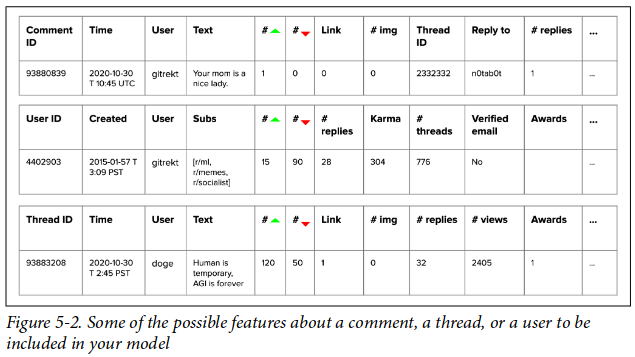

    - Hay muchas caracter√≠sticas posibles para usar: el proceso de elegir qu√© informaci√≥n utilizar y c√≥mo extraer esta informaci√≥n en un formato usable por tus modelos de ML es la <span style="color: blue;">__ingenier√≠a de features__</span>. 
        - Para <span style="color: blue;">tareas complejas</span> como recomendar videos para que los usuarios vean a continuaci√≥n en TikTok, el <span style="color: blue;">n√∫mero de caracter√≠sticas utilizadas puede llegar a millones.</span> 
        - Para <span style="color: blue;">tareas espec√≠ficas</span>  de un dominio, como predecir si una transacci√≥n es fraudulenta, es posible que necesites experiencia en el √°rea bancaria y fraudes para poder generar caracter√≠sticas √∫tiles.

## 2. Operaciones Comunes en el Feature Engineering

### 2.1 Manejo de Valores Faltantes üßê

- Una de las primeras cosas que podr√≠as notar al trabajar con datos en producci√≥n es que algunos valores est√°n ausentes. 
- No todos los tipos de valores faltantes son iguales: hay tres tipos.
- Para entender esto, vamos a considerar la tarea de predecir si alguien comprar√° una casa en los pr√≥ximos 12 meses.

    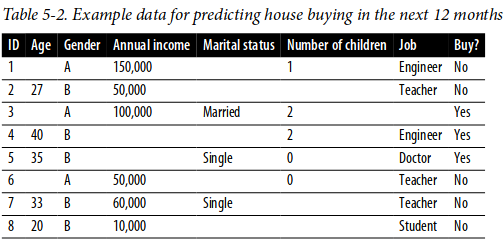

    #### 2.1.1 Faltantes no al azar (MNAR, Missing Not At Random)
    - La raz√≥n por la que falta un valor<span style="color: blue;">se debe al valor verdadero en s√≠.</span> 
    - En el ejemplo, podr√≠amos notar que algunos encuestados no divulgaron su <span style="color: blue;">ingreso</span>. Al investigar, puede resultar que el ingreso de los encuestados que no reportaron tiende a ser m√°s alto que el de aquellos que s√≠ divulgaron. Es decir, los valores de ingreso faltan por razones relacionadas con los valores mismos.

        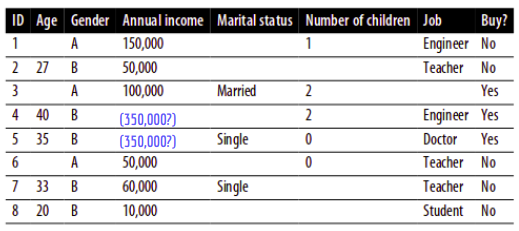

    #### 2.1.2 Faltantes al azar (MAR, Missing At Random)
    - La raz√≥n por la que falta un valor no <span style="color: blue;">se debe</span> al valor en s√≠, sino <span style="color: blue;">a otra variable observada</span>. 
    - En el ejemplo, podr√≠amos notar que los valores de <span style="color: blue;">edad</span> a menudo faltan para los encuestados del <span style="color: pink;">g√©nero "A"</span>, lo cual podr√≠a ser porque las personas del g√©nero A en esta encuesta no les gusta divulgar su edad.

        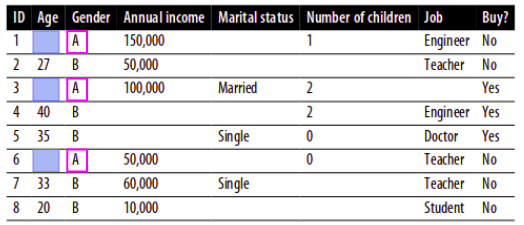

    #### 2.1.3 Faltantes completamente al azar (MCAR, Missing Completely At Random)
    - <span style="color: blue;">No hay un patr√≥n</span> que indique en que momento falta el valor. 
    - En el ejemplo, podr√≠amos pensar que los valores faltantes para la columna <span style="color: blue;">‚ÄúTrabajo‚Äù</span> podr√≠an ser completamente aleatorios, no por el trabajo en s√≠ ni por ninguna otra variable. 
    - Las personas simplemente olvidan llenar ese valor a veces sin raz√≥n particular. 
    - Sin embargo... este tipo de falta es <span style="color: blue;">muy raro: generalmente hay razones</span> por las cuales ciertos valores faltan, y deber√≠as investigarlas.

        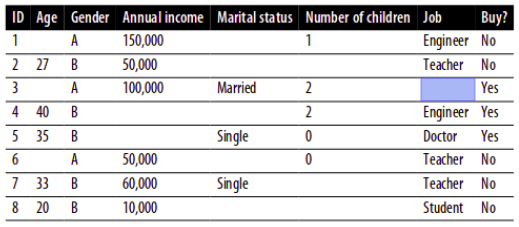


Cuando encontramos valores faltantes, podemos rellenarlos con ciertos valores (__imputaci√≥n__) o eliminarlos (__eliminaci√≥n__):

#### üóëÔ∏è Eliminaci√≥n

Muchos tienden a preferir la eliminaci√≥n, no porque sea el mejor m√©todo, sino porque es m√°s f√°cil de hacer. 
1. __Eliminar columnas__: eliminar columnas a las que les faltan demasiadas entradas.
    - Desventajas: incluso si faltan la mitad de los valores, los datos restantes siguen siendo informaci√≥n potencialmente √∫til para las predicciones.
    - Ejemplo, incluso si falta m√°s de la mitad de la columna "Marital status", el estado civil sigue estando altamente correlacionado con la compra de vivienda.

2. __Eliminar filas__: eliminar muestras que tienen valores faltantes.
    - <font color='green'>Buen caso de uso:</font> faltan datos completamente al azar <span style="color: blue;">(MCAR)</span> y el <span style="color: blue;">n√∫mero de ejemplos</span> con valores faltantes <span style="color: blue;">es chico</span> (ej, < del 0.1%). 
        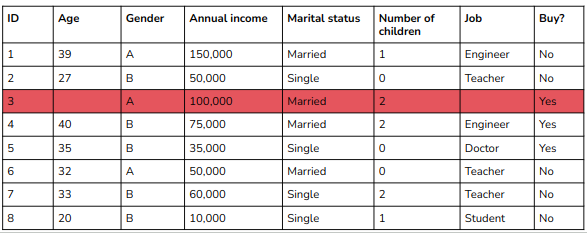
    - <font color='red'>P√©simos casos de uso:</font> 
        1. __Muchos ejemplos tienen valores faltantes.__

            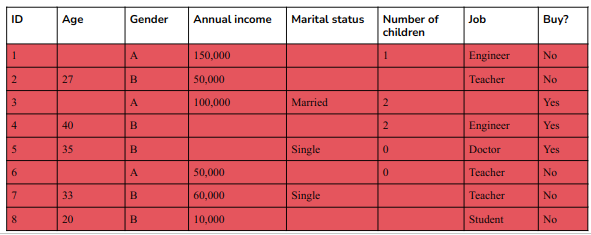
        2. __Valores faltantes no son al azar (MNAR)__. La informaci√≥n faltante es informaci√≥n en s√≠. 
        - Ejemplo: eliminar muestras con ingresos faltantes (puede significar ingreso m√°s alto).
        
            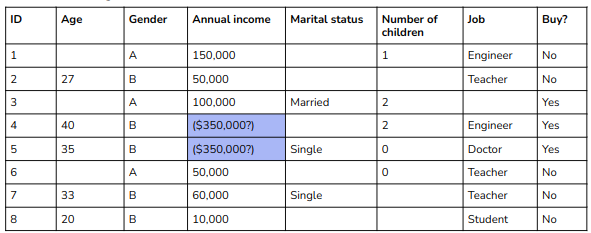
        3. __Valores faltantes son al azar (MAR)__. Puede crear sesgos en el modelo.
        - Ejemplo: sin querer, eliminamos todas las muestras de g√©nero A.
            
            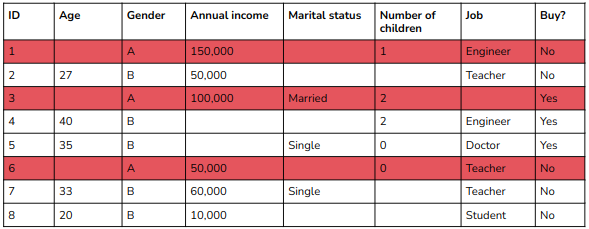

#### üëâ Imputaci√≥n

Si no quieres eliminar los valores faltantes, tendr√°s que imputarlos, lo que significa <span style="color: blue;">"rellenarlos con ciertos valores"</span>. Decidir qu√© ‚Äúciertos valores‚Äù usar es la parte dif√≠cil.

- Valores predeterminados. 
    - Ejemplo: 0, string vac√≠o, etc.
- Medidas estad√≠sticas (media, moda, mediana).
    - Ejemplo: si falta el valor de la temperatura para una muestra de datos en julio, podemos rellenarlo con la temperatura mediana de julio.
- Muchos m√°s m√©todos [(Ver Documentaci√≥n Scikit)](https://scikit-learn.org/stable/modules/impute.html).

Ambas pr√°cticas funcionan bien en muchos casos, pero a veces <span style="color: blue;">pueden causar errores dif√≠ciles de detectar</span>. Ejemplo: frontend ya no ped√≠a ingresar la edad.

‚úÖ Es una buena pr√°ctica <font color='red'>evitar rellenar los valores faltantes con valores posibles</font>. 
- Ejemplo: rellenar el n√∫mero de hijos faltantes con 0, dificulta distinguir entre personas cuya informaci√≥n falta y personas que no tienen hijos.



<div style="background-color: #f9f9f9; border-left: 4px solid #4CAF50; padding: 10px; font-size: 0.9em;">

üí°No hay una manera perfecta de manejar los valores faltantes. 
- Con la eliminaci√≥n, corres el riesgo de perder informaci√≥n importante o acentuar sesgos. 
- Con la imputaci√≥n, corres el riesgo de inyectar tu propio sesgo y agregar ruido a tus datos, o peor a√∫n, filtraci√≥n de datos.

</div>

### 2.2 Escalado/Normalizaci√≥n

Si volvemos al dataset de venta de casas, los valores de la variable "Edad" van de 20 a 40, mientras que los valores de la variable "Ingreso Anual" van de 10k a 150k. Cuando introducimos estas dos variables en un modelo de ML, no entender√° que 150k y 40 representan cosas diferentes: solo los ver√° como n√∫meros. Dado que 150k >>> 40, podr√≠a darle m√°s importancia, sin importar qu√© variable sea realmente m√°s √∫til para generar predicciones. 

Por este motivo, antes de introducir las caracter√≠sticas en los modelos, es importante <span style="color: blue;">escalarlas para que est√©n en rangos similares</span>. 
- Es una de las cosas m√°s simples que podemos hacer y suele resultar en un aumento del rendimiento del modelo. 
- No hacerlo puede hacer que el modelo haga predicciones sin sentido, especialmente con algoritmos cl√°sicos como gradient-boosted trees y regresi√≥n log√≠stica.

#### ¬øNormalizaci√≥n es lo mismo que escalado?

Cuando normalizamos estamos cambiando la _forma_ de la distribuci√≥n, mientras que cuando escalamos estamos cambiando el _rango_ de los datos.
- __Escalado__: Es necesario cuando usamos m√©todos que se basan en medidas de cercan√≠a entre puntos, como SVM o KNN.
- __Normalizaci√≥n__: El objetivo es transformar las observaciones para que se ajusten a una distribuci√≥n normal. En general, lo hacemos si vamos a usar un modelo de ML que asume que los datos est√°n distribuidos normalmente (LDA, Gaussian Naive Bayes).

  | **Transformaci√≥n**      | **Caso de Uso**                                             | **F√≥rmula**                                  | **Rango**                      |
  |---------------------------|------------------------------------------------------------|---------------------------------------------|--------------------------------|
  | Min/Max      | Cualquier caso: sin suposiciones sobre variables!          |$x' = a + \frac{x - \min(x)}{\max(x) - \min(x)} \cdot (b - a) $ | [a, b]                        |
  | Z-Score Standarization    | Cuando las variables siguen una distribuci√≥n normal        | $x' = \frac{x - \mu}{\sigma}$              | $-\infty, \infty$           |
  | Log                | Cuando las variables siguen una distribuci√≥n exponencial  | $x' = \log(x)$                           | $-\infty, \infty$            |




* La <span style="color: blue;">transformaci√≥n logar√≠tmica es √∫til para datos sesgados porque reduce la influencia de valores extremos</span>, acercando los outliers al centro de la distribuci√≥n.
* Esto hace que los <span style="color: blue;">datos sean m√°s sim√©tricos</span>, lo que mejora el rendimiento de modelos que asumen una distribuci√≥n normal. 

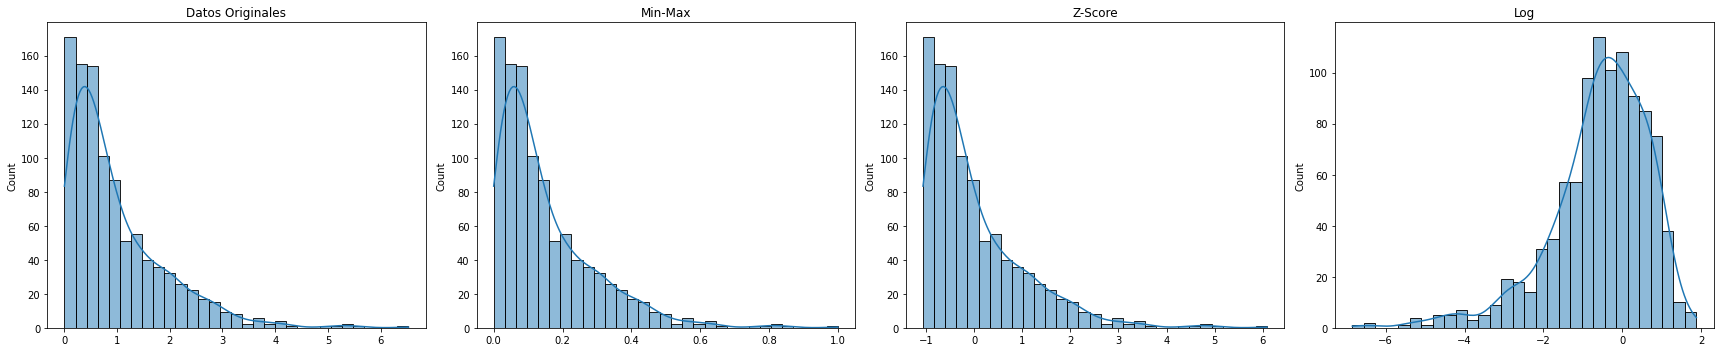

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

original_data = np.random.exponential(size=1000) + 0.001
original_data_reshaped = original_data.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(original_data_reshaped)

log_transformed_data = np.log(original_data_reshaped)

standard_scaler = StandardScaler()
z_score_transformed_data = standard_scaler.fit_transform(original_data_reshaped)

fig, ax = plt.subplots(1, 4, figsize=(24, 5))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Datos Originales")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Min-Max")
sns.histplot(z_score_transformed_data, ax=ax[2], kde=True, legend=False)
ax[2].set_title("Z-Score")
sns.histplot(log_transformed_data, ax=ax[3], kde=True, legend=False)
ax[3].set_title("Log")

plt.tight_layout()
plt.show()

Aspectos importantes a tener en cuenta:
1. Puede ser una <span style="color: blue;">fuente com√∫n de data leakage</span>. 
2. Requiere estad√≠sticas globales.
    - Tenemos que observar todos los datos de entrenamiento o un subconjunto de ellos para calcular su m√≠nimo, m√°ximo o media. 
    - Durante la <span style="color: blue;">inferencia, reutilizamos las estad√≠sticas obtenidas durante el entrenamiento</span> para escalar nuevos datos. 
    - <span style="color: blue;">Si los nuevos datos cambiaron significativamente</span> en comparaci√≥n con los datos de entrenamiento, estas <span style="color: blue;">estad√≠sticas no ser√°n muy √∫tiles.</span>
    - Por este motivo es <span style="color: blue;">importante volver a entrenar el modelo con frecuencia</span> para tener en cuenta estos cambios.

### 2.3 Encoding de Features Categ√≥ricas

Es el proceso de convertir datos categ√≥ricos o textuales en un formato num√©rico, ya que la mayor√≠a de los algoritmos de machine learning trabajan con n√∫meros y no con texto o variables categ√≥ricas.

Hay dos tipos de datos categ√≥ricos:

##### <span style="color: black;">Datos Ordinales</span>
- Tienen un <span style="color: blue;">orden inherente</span>. 
- Es decir, las categor√≠as pueden ser clasificadas o ordenadas de mayor a menor o viceversa.
- Ejemplo, la variable <span style="color: blue;">‚Äút√≠tulo de estudio m√°s alto‚Äù</span> es una variable ordinal. Las categor√≠as (Secundaria, Diploma, Licenciatura, Maestr√≠a, PhD) pueden ser clasificadas en orden de nivel educativo alcanzado.

##### <span style="color: black;">Datos Nominales</span>
- <span style="color: blue;">No tienen un orden inherente</span>. 
- Es decir, las categor√≠as no pueden ser clasificadas ni ordenadas.
- Ejemplo, la variable <span style="color: blue;">‚Äúciudad de residencia‚Äù</span> es una variable nominal. Las categor√≠as (Delhi, Mumbai, Ahmedabad, Bangalore, etc.) no pueden ser clasificadas ni ordenadas.

La elecci√≥n del m√©todo de codificaci√≥n puede tener un impacto significativo en el rendimiento del modelo, por lo que es <span style="color: blue;">importante seleccionar una t√©cnica de codificaci√≥n adecuada seg√∫n la naturaleza de los datos</span> y los requisitos espec√≠ficos del modelo.

#### 2.3.1 One-Hot Encoding

- M√©todo m√°s com√∫n para codificar variables categ√≥ricas.
- Se crea una columna binaria para cada categor√≠a √∫nica en la variable.
- Si una categor√≠a est√° presente en una muestra, la columna correspondiente se establece en 1, y todas las dem√°s columnas se establecen en 0.
- Por ejemplo, si una variable tiene tres categor√≠as ‚ÄòA‚Äô, ‚ÄòB‚Äô y ‚ÄòC‚Äô, se crear√°n tres columnas y una muestra con la categor√≠a ‚ÄòB‚Äô tendr√° el valor [0, 1, 0].

In [2]:
import pandas as pd

df = pd.DataFrame({'color': ['red', 'green', 'blue', 'red']})
one_hot = pd.get_dummies(df['color'])
print(one_hot.astype(int))

   blue  green  red
0     0      0    1
1     0      1    0
2     1      0    0
3     0      0    1


#### 2.3.2 Label Encoding

- A cada categor√≠a √∫nica se le asigna un valor entero √∫nico.

- Este es un m√©todo de codificaci√≥n m√°s sencillo, pero tiene una desventaja: los enteros asignados pueden ser malinterpretados por el algoritmo como si tuvieran una relaci√≥n ordenada cuando, en realidad, no la tienen.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['color_label'] = le.fit_transform(df['color'])
print(df)

   color  color_label
0    red            2
1  green            1
2   blue            0
3    red            2


#### 2.3.3 Ordinal Encoding

- Se usa cuando las categor√≠as en una variable tienen un orden natural.

- Por ejemplo, si una variable tiene categor√≠as como ‚ÄòBajo‚Äô, ‚ÄòMedio‚Äô y ‚ÄòAlto‚Äô, se les pueden asignar los valores 1, 2 y 3, respectivamente.


In [4]:
df = pd.DataFrame({'quality': ['low', 'medium', 'high', 'medium']})
quality_map = {'low': 0, 'medium': 1, 'high': 2}
df['quality_map'] = df['quality'].map(quality_map)
print(df)

  quality  quality_map
0     low            0
1  medium            1
2    high            2
3  medium            1


#### 2.3.4 Codificaci√≥n Binaria

- Es similar a la codificaci√≥n one-hot, pero en lugar de crear una columna separada para cada categor√≠a, las categor√≠as se representan como d√≠gitos binarios.

- Por ejemplo, si una variable tiene cuatro categor√≠as ‚ÄòA‚Äô, ‚ÄòB‚Äô, ‚ÄòC‚Äô y ‚ÄòD‚Äô, se pueden representar como 0001, 0010, 0100 y 1000, respectivamente.

In [5]:
df = pd.DataFrame({'animal': ['cat', 'dog', 'bird', 'cat']})
print(f"Before Encoding the Data:\n\n{df}\n")

animal_map = {'cat': 0, 'dog': 1, 'bird': 2}
df['animal'] = df['animal'].map(animal_map)
df['animal'] = df['animal'].apply(lambda x: format(x, 'b'))

print(f"After Encoding the Data:\n\n{df}\n")

Before Encoding the Data:

  animal
0    cat
1    dog
2   bird
3    cat

After Encoding the Data:

  animal
0      0
1      1
2     10
3      0



#### 2.3.5 Count Encoding

- La codificaci√≥n por conteo es un m√©todo para codificar variables categ√≥ricas contando el n√∫mero de veces que aparece una categor√≠a en el conjunto de datos.

- Por ejemplo, si la variable "Producto" tiene las categor√≠as ‚ÄòA‚Äô, ‚ÄòB‚Äô y ‚ÄòC‚Äô y la categor√≠a ‚ÄòA‚Äô aparece 10 veces en el conjunto de datos, se le asignar√° un valor de 10. En este caso, la frecuencia de ese producto representa su popularidad. Es decir, un producto con mayor n√∫mero es m√°s probable de ser vendido.

In [6]:
df = pd.DataFrame({'fruit': ['apple', 'banana', 'grapes', 'banana']})
print(f"Before Encoding the Data:\n\n{df}\n")

counts = df['fruit'].value_counts()
df['fruit'] = df['fruit'].map(counts)

print(f"After Encoding the Data:\n\n{df}\n")

Before Encoding the Data:

    fruit
0   apple
1  banana
2  grapes
3  banana

After Encoding the Data:

   fruit
0      1
1      2
2      1
3      2



#### 2.3.6 Target Encoding

- Es una t√©cnica de codificaci√≥n m√°s avanzada utilizada para tratar caracter√≠sticas categ√≥ricas con <span style="color: blue;">alta cardinalidad</span>, es decir, caracter√≠sticas con <span style="color: blue;">muchas categor√≠as</span> √∫nicas.

- Se calcula el <span style="color: blue;">valor promedio del objetivo para cada categor√≠a</span>, y este valor promedio se utiliza para <span style="color: blue;">reemplazar la caracter√≠stica categ√≥rica.</span>

- Esta t√©cnica tiene la ventaja de considerar la relaci√≥n entre el objetivo y la caracter√≠stica categ√≥rica, pero tambi√©n puede llevar al sobreajuste si no se usa con precauci√≥n.

In [9]:
df = pd.DataFrame({'fruit': ['apple', 'apple', 'banana', 'grapes', 'grapes', 'banana'],
                   'target': [100, 103, 142, 200, 198, 150]})
print(f"Before Encoding the Data:\n\n{df}\n")

target_mean = df.groupby('fruit')['target'].mean()
df['fruit_label'] = df['fruit'].map(target_mean)
print(f"After Encoding the Data:\n\n{df}")

Before Encoding the Data:

    fruit  target
0   apple     100
1   apple     103
2  banana     142
3  grapes     200
4  grapes     198
5  banana     150

After Encoding the Data:

    fruit  target  fruit_label
0   apple     100        101.5
1   apple     103        101.5
2  banana     142        146.0
3  grapes     200        199.0
4  grapes     198        199.0
5  banana     150        146.0


<span style="color: blue;">En producci√≥n, las categor√≠as cambian constantemente</span>, lo que puede causar problemas si tu modelo no est√° preparado para manejar nuevas categor√≠as o marcas. Veamos un ejemplo.

> ##### Ejemplo: Queremos construir un sistema de recomendaci√≥n para predecir qu√© productos podr√≠an querer comprar los usuarios en Mercado Libre. Existen m√°s de 2 millones de marcas que tenemos que recomendar.
>          
>
> ##### ü§îüí≠ __¬øComo encodeamos las diferentes marcas?__
> #####  ü§îüí≠ __En producci√≥n, nuestro modelo falla porque encuentra una marca que nunca vi√≥ y, por lo tanto, no puede codificar.  ¬øComo manejamos nuevas marcas que publican en Mercado Libre?__
> Encodeamos marcas no vistas durante el entrenamiento como "UNKNOWN".
> #####  ü§îüí≠ __El modelo ya no falla en producci√≥n! Pero... los vendedores se quejan de que sus nuevas marcas no est√°n recibiendo tr√°fico. ¬øPor qu√© ocurre esto y como lo solucionamos?__
> Nuestro modelo no vio la categor√≠a UNKNOWN en el conjunto de entrenamiento, por lo que simplemente no recomienda ning√∫n producto de la marca UNKNOWN. Solucionamos esto codificando solo las 99% marcas m√°s populares y codificando el 1% inferior como UNKNOWN. De esta manera, al menos nuestro modelo sabe c√≥mo manejar las marcas UNKNOWN. 
> #####  ü§îüí≠ __Nuestro modelo est√° funcionando bien, pero ahora Nike quiere unirse a Mercado Libre como vendedor. ¬øPueden identificar cual puede ser el siguiente problema?__
> Nuestro modelo va a tratar a todas las marcas nuevas (ya sean de lujo, de imitaci√≥n dudosa o marcas consolidadas) de la misma manera que trata a las marcas menos populares (durante entrenamiento) de Mercado Libre.
> ##### ü§îüí≠ __Entonces: ¬øC√≥mo hacemos para implementar un m√©todo flexible para manejar nuevas marcas a medida que son introducidas en nuestro sistema?__
> Una soluci√≥n a este problema es el truco de hashing: usas una funci√≥n hash para generar un valor hash de cada categor√≠a. El valor hash se convierte en el √≠ndice de esa categor√≠a.
> - Ejemplo: hash("Nike") = 0, hash("Adidas") = 27, etc.
> - Ventajas: podemos elegir que tan grande es el espacio de hashing.
> - Desventajas: dos categor√≠as podr√≠an estar hasheadas al mismo √≠ndice.

### 2.5 Feature Crossing (Combinaci√≥n de Features)

- Un <span style="color: blue;">modelo lineal que utiliza one-hot encoding</span> para cada variable categ√≥rica puede capturar los efectos principales de cada variable, pero <span style="color: blue;">no puede capturar los efectos de interacci√≥n</span> entre ellas. 
- Por ejemplo, supongamos que queremos predecir la eficiencia de combustible de un veh√≠culo dadas dos variables categ√≥ricas de entrada: 
    - El <span style="color: blue;">tipo de veh√≠culo</span> (por ejemplo, SUV (S), Camioneta (T) o Auto familiar (F)) y 
    - El <span style="color: blue;">pa√≠s de origen</span> (por ejemplo, USA (U) o Jap√≥n (J)). 
- Si concatenamos las codificaciones one-hot para las caracter√≠sticas ternarias y binarias, obtenemos la siguiente codificaci√≥n de entrada:

    $$
    \phi(x) = [1, I (x_1 = S) , I (x_1 = T ) , I (x_1 = F ) , I (x_2 = U ) , I (x_2 = J)]
    $$ 
    donde $x_1$ es el tipo de veh√≠culo y $x_2$ es el pa√≠s de origen. 

- Este modelo no puede capturar dependencias entre las caracter√≠sticas. 
- Por ejemplo, esperamos que las camionetas sean menos eficientes en el consumo de combustible, pero tal vez las camionetas de USA sean incluso menos eficientes que las camionetas de Jap√≥n. Esto no se puede capturar utilizando el modelo lineal en la ecuaci√≥n anterior, ya que la contribuci√≥n del pa√≠s de origen es independiente del tipo de veh√≠culo.

- Podemos solucionar esto calculando cruces de caracter√≠sticas expl√≠citas. 
- Por ejemplo, podemos definir una nueva caracter√≠stica compuesta con 3 √ó 2 valores posibles para capturar la interacci√≥n entre el tipo de veh√≠culo y el pa√≠s de origen. El nuevo modelo se convierte en:

$$
f (x; w) = w^T\phi(x) 
= w_0 + w_1I (x_1 = S) + w_2I (x_1 = T ) + w_3I (x_1 = F ) + w_4I (x_2 = U ) + w_5I (x_2 = J ) + w_6I (x_1 = S, x_2 = U ) + \\ w_7I (x_1 = T, x_2 = U ) + w_8I (x_1 = F, x_2 = U ) + w_9I (x_1 = S, x_2 = J ) + w_{10}I (x_1 = T, x_2 = J ) + w_{11}I (x_1 = F, x_2 = J )
$$

- Esto convierte el conjunto de datos original en un formato m√°s amplio, con muchas m√°s columnas.

- Debido a que ayuda a modelar relaciones no lineales entre variables, es muy <span style="color: blue;">√∫til en modelos que no pueden aprender relaciones no lineales</span>(regresi√≥n lineal, la regresi√≥n log√≠stica y los modelos basados en √°rboles).
- No es tan importante en redes neuronales, pero igualmente puede ser √∫til porque el cruce expl√≠cito a veces las ayuda a aprender relaciones no lineales m√°s r√°pido.
- <font color='red'>Cuidado:</font> feature crossing puede explotar el espacio de caracter√≠sticas.
    - Ejemplo: Features A y B tienen 100 categor√≠as c/u ‚Üí El cruce (Feature AxB) tendr√° 100000 valores posibles!
    - <span style="color: blue;">Necesitamos MUCHOS m√°s datos</span> para que el modelo aprenda todos los valores posibles.
    - Explotar el espacio de features aumenta el <span style="color: blue;">riesgo de overfitting</span> (puede hacer que los modelos se ajusten en exceso a los datos de entrenamiento.)

## 3. Data Leakage

### 3.1 ¬øQu√© es el Data Leakage?
- Ocurre cuando la <span style="color: blue;">informaci√≥n del conjunto de prueba se filtra al conjunto de entrenamiento</span>, afectando la validez del modelo.
- Esta misma informaci√≥n no est√° disponible durante la inferencia.
- Es muy desafiante porque, por lo general, no es obvia. Es peligrosa porque <span style="color: blue;">puede hacer que tus modelos fallen de manera inesperada</span>, incluso despu√©s de una evaluaci√≥n y pruebas exhaustivas. 
- Ejemplo: <span style="color: blue;">‚ÄúHundreds of AI Tools Have Been Built to Catch Covid. None of Them Helped‚Äù</span>, MIT Technology Review, Julio 2021.

<div class="alert alert-block alert-info" style="background-color: #d0e8f2; border-color: #d0e8f2; color: #000;">
<b>Ejemplo 1: Detecci√≥n de c√°ncer de pulm√≥n usando tomograf√≠as computarizadas (CT)</b> 

- Data: recolectada del hospital A
- Tiene buena performance sobre el test set del hospital A.
- Tiene muy mala performance sobre el test set del hospital B.
- Features:

  | Patient ID | Date |Doctor note | Medical record | Scanner type | CT scan |
  |---|---|---|---|---|---|

<b>¬øQu√© puede haber ocurrido?</b> 
</div>

- Despu√©s de investigar, descubrimos que en el <span style="color: blue;">Hospital A</span>, los pacientes que se sospecha tienen c√°ncer de pulm√≥n son enviados a <span style="color: blue;">una m√°quina de escaneo m√°s avanzada</span>, que produce im√°genes diferentes. 
- El modelo aprendi√≥ a predecir el c√°ncer <span style="color: blue;">
bas√°ndose en la m√°quina de escaneo</span>, pero el Hospital B usa equipos al azar, lo que causa que el modelo no funcione bien. 
- Esto muestra que __las etiquetas se filtraron en las caracter√≠sticas durante el entrenamiento__.

<div class="alert alert-block alert-info" style="background-color: #d0e8f2; border-color: #d0e8f2; color: #000;">
<b>Ejemplo 2: Predicci√≥n del n√∫mero de views de un art√≠culo</b> 

- Data: informaci√≥n hist√≥rica del sitio web.
- Features:

  | Article ID | Date |Title | Article | Author | Language | Translations |
  |---|---|---|---|---|---|---|

<b>¬øDe donde puede venir el data leakage?</b> 
</div>

- Despu√©s de investigar, descubrimos que el sitio web solamente <span style="color: blue;">traduce art√≠culos</span> que est√°n siendo muy <span style="color: blue;">
populares</span>.

### 3.2 Causas t√≠picas del Data Leakage

#### 3.2.1 Divisi√≥n de Datos Correlacionados Temporalmente

- <span style="color: blue;">Dividir aleatoriamente</span> los datos en conjuntos de entrenamiento, validaci√≥n y prueba puede causar filtraci√≥n de datos.
- <span style="color: blue;">Algunos datos estan correlacionados temporalmente.</span>
    - Ejemplo 1: precios de las acciones.
        - Acciones similares tienden a moverse juntos.
        - Si el 90% de las acciones tecnol√≥gicas bajan hoy, es muy probable que el otro 10% tambi√©n baje.
    - Ejemplo 2: predecir si alguien har√° clic en una recomendaci√≥n de canci√≥n. 
        - No solo depende del gusto musical individual, sino tambi√©n de la tendencia musical general del d√≠a.
        - Si fallece un artista, probablemente m√°s personas escuchen sus canciones ese d√≠a. Incluir muestras de ese d√≠a filtra informaci√≥n sobre la tendencia musical.
- __Prevenci√≥n: Dividir los datos por tiempo.__
    - Entrenamos con datos de los primeros d√≠as y evaluamos con datos de d√≠as posteriores.
    - Sino, los precios de los d√≠as posteriores pueden aparecer en el conjunto de entrenamiento y filtrar informaci√≥n sobre las condiciones del mercado en ese d√≠a.
    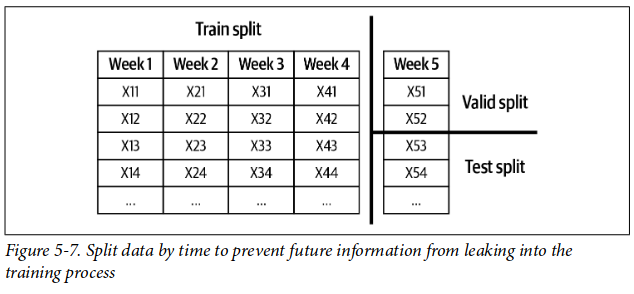

#### 3.2.2 Escalado Antes de la Divisi√≥n de Datos

- El <span style="color: blue;">escalado requiere estad√≠sticas globales</span>, como la media y la varianza, de tus datos.
- Error t√≠pico: 
    - Usar los datos completos para generar estas estad√≠sticas globales antes de dividir los datos en diferentes conjuntos.
    - Esto <span style="color: blue;">puede filtrar la media y la varianza de las muestras de prueba en el proceso de entrenamiento</span>, permitiendo que el modelo ajuste sus predicciones para esas muestras de prueba. 
- <span style="color: blue;">En producci√≥n</span>, esta informaci√≥n <span style="color: blue;">no est√° disponible</span>, por lo que el rendimiento del modelo probablemente baje. 
- __Prevenci√≥n: Dividir los datos antes de escalarlos__. 
    - Despu√©s, usamos las estad√≠sticas del conjunto de entrenamiento para escalar todos los conjuntos.

#### 3.2.3 Imputaci√≥n de Datos Faltantes con Estad√≠sticas del Conjunto de Prueba
- Error t√≠pico: 
    - Rellenar los valores faltantes de una caracter√≠stica con la media o la mediana de todos los valores presentes. 
    - Este tipo de filtraci√≥n es <span style="color: blue;">similar a la causada por el escalado</span> y se puede prevenir utilizando √∫nicamente las estad√≠sticas del conjunto de entrenamiento para rellenar los valores faltantes en todos los conjuntos.
- __Prevenci√≥n: Dividir los datos antes de imputar valores faltantes__. Aseg√∫rate de calcular la media o la mediana solo a partir del conjunto de entrenamiento y usar estos valores para rellenar los datos faltantes en todos los conjuntos.

#### 3.2.4 Manejo Deficiente de la Duplicaci√≥n de Datos Antes de la Divisi√≥n

- Si hay datos duplicados, no eliminarlos antes de dividir los datos puede hacer que las <span style="color: blue;">mismas muestras aparezcan tanto en el conjunto de entrenamiento como en el de validaci√≥n/prueba.</span>
- La duplicaci√≥n de datos es bastante com√∫n en la industria y tambi√©n se ha encontrado en conjuntos de datos de investigaci√≥n populares.
    - Por ejemplo, CIFAR-10 y CIFAR-100, dos conjuntos de datos populares utilizados en investigaci√≥n de visi√≥n por computadora, fueron lanzados en 2009, pero no fue hasta 2019 que Barz y Denzler descubrieron que el 3.3% y el 10% de las im√°genes de los conjuntos de prueba de CIFAR-10 y CIFAR-100 tienen duplicados en el conjunto de entrenamiento.

Causas de la Duplicaci√≥n de Datos:

1. <span style="color: blue;">Recolecci√≥n de Datos</span>: Al combinar diferentes fuentes de datos, puede ocurrir duplicaci√≥n si una fuente ya contiene datos de otra.
2. <span style="color: blue;">Procesamiento de Datos</span>: T√©cnicas como el sobremuestreo pueden resultar en la duplicaci√≥n de ciertos ejemplos.

- __Prevenci√≥n__:

    - Verificar Duplicados Antes y Despu√©s de la Divisi√≥n: Revisa nuevamente despu√©s de la divisi√≥n para confirmar que no hay duplicados entre los conjuntos.
    - Sobremuestreo Despu√©s de la Divisi√≥n: Realiza cualquier sobremuestreo solo despu√©s de haber dividido los datos para evitar la duplicaci√≥n de muestras entre los conjuntos.

#### 3.2.5 Filtraci√≥n por Grupos

- <span style="color: blue;">Un grupo de ejemplos con etiquetas altamente correlacionadas</span> se divide en diferentes conjuntos de datos. 
    - Ejemplo 1: paciente con 2 CT tomadas con una semana de diferencia, ambas con la misma etiqueta (c√°ncer o no). Si una de estas im√°genes est√° en el conjunto de entrenamiento y la otra en el conjunto de prueba, se produce una filtraci√≥n por grupos.
    - Ejemplo 2: en tareas como la detecci√≥n de objetos, algunas im√°genes de un mismo objeto, tomadas en milisegundos de diferencia, pueden estar distribuidas en los conjuntos de entrenamiento y prueba.
- __Prevenci√≥n: Conocimiento de la Generaci√≥n de Datos__. Tenemos que entender c√≥mo se generan los datos. 

#### 3.2.6 Filtraci√≥n del Proceso de Generaci√≥n de Datos
- Ocurre cuando la <span style="color: blue;">forma en que se genera o se recoge la informaci√≥n introduce sesgos</span> que afectan el modelo. 
- Ejemplo: el caso donde la informaci√≥n sobre si una tomograf√≠a muestra signos de c√°ncer de pulm√≥n se filtra a trav√©s de la m√°quina de escaneo utilizada. 
- <span style="color: blue;">Detectarlo requiere comprensi√≥n profunda de c√≥mo se recopilan los datos.</span>
    - No es facil identificar que el rendimiento deficiente se debe a scanners diferentes si no sabemos que los procedimientos y/o equipos de los hospitales son diferentes.
- __Prevenci√≥n__:
    - <span style="color: blue;">Rastreo de Fuentes</span>: Mantener un registro de las fuentes de tus datos y comprender c√≥mo se recopilan y procesan.
    - <span style="color: blue;">Normalizaci√≥n de Datos</span>: Normalizar los datos para que la informaci√≥n de diferentes fuentes tenga medias y varianzas similares. 
        - Por ejemplo, si diferentes m√°quinas de CT producen im√°genes con resoluciones distintas, normalizar todas las im√°genes a una misma resoluci√≥n puede dificultar que el modelo identifique la m√°quina de escaneo original.
    - <span style="color: blue;">Incorporaci√≥n de Expertos</span>: Involucrar a expertos que tengan contexto sobre c√≥mo se recopilan y utilizan los datos en el proceso de dise√±o del modelo.

### 3.3 Detecci√≥n de Filtraci√≥n de Datos
- Puede ocurrir en varias etapas, desde la generaci√≥n y recopilaci√≥n de datos hasta el muestreo, la divisi√≥n y el procesamiento de datos.
- <span style="color: blue;">Crucial estar atentos al data leakage durante __todo el ciclo de vida del proyecto__</span>.
- Estrategias:
    1. <span style="color: blue;">Medir el Poder Predictivo de las Caracter√≠sticas</span>
        - Evaluar la <span style="color: blue;">correlaci√≥n de cada caracter√≠stica con respecto a la variable objetivo.</span>
        - Si hay una correlaci√≥n inusualmente alta, investigar c√≥mo se genera esa feature y si esa correlaci√≥n tiene sentido.
        - Tener en cuenta que a veces 2 features no tienen filtraci√≥n por si solas pero s√≠ en conjunto.
            - Ejemplo: para predecir cu√°nto tiempo permanecer√° un empleado en una empresa, la fecha de inicio y la fecha de finalizaci√≥n por separado no dicen mucho sobre su permanencia, pero juntas proporcionan esa informaci√≥n.
    2. <span style="color: blue;">Estudios de Ablaci√≥n</span>
        - Medir la importancia de una caracter√≠stica en el modelo.
        - Si eliminar una caracter√≠stica causa una disminuci√≥n significativa en el rendimiento del modelo, investiga por qu√© esa caracter√≠stica es tan importante. 
        - Aunque puede ser inviable realizarlo para todas las combinaciones de features, a√∫n es √∫til realizar estos estudios ocasionalmente con un subconjunto de caracter√≠sticas que sospechas m√°s.
    3. <span style="color: blue;">Monitoreo de Nuevas Caracter√≠sticas</span>
        - Si agregar una nueva caracter√≠stica mejora significativamente el rendimiento del modelo, podr√≠a ser que esa caracter√≠stica sea realmente √∫til o que contenga informaci√≥n filtrada sobre las etiquetas. 


## 4. Engineering Good Features (Ingenier√≠a de Buenas Features)

- Agregar m√°s caracter√≠sticas generalmente mejora el rendimiento del modelo. Pero esto no es cierto siempre.
- <span style="color: blue;">Tener demasiadas caracter√≠sticas puede ser perjudicial tanto durante el entrenamiento como al servir el modelo</span>, por las siguientes razones:

1. Cuantas m√°s caracter√≠sticas, <span style="color: blue;">m√°s chances de data leakage.</span>
2. Demasiadas features pueden causar <span style="color: blue;">overfitting</span>.
3. Un gran n√∫mero de features puede <span style="color: blue;">aumentar la memoria necesaria para servir el modelo</span>, lo que podr√≠a requerir m√°quinas o instancias m√°s costosas.
4. Un exceso de caracter√≠sticas puede <span style="color: blue;">incrementar la latencia en la inferencia cuando se realizan predicciones en l√≠nea</span>, especialmente si es necesario extraer estas caracter√≠sticas de datos crudos para hacer predicciones en tiempo real.
5. Las caracter√≠sticas in√∫tiles se convierten en <span style="color: blue;">deudas t√©cnicas</span>. Cuando cambia tu pipeline de datos, todas las caracter√≠sticas afectadas deben ajustarse. Por ejemplo, si tu aplicaci√≥n deja de aceptar la edad de los usuarios, las caracter√≠sticas relacionadas con la edad deben actualizarse.

- En teor√≠a, si una caracter√≠stica no ayuda a un modelo a hacer buenas predicciones, t√©cnicas como la regularizaci√≥n L1 deber√≠an reducir el peso de esa caracter√≠stica a 0. 
- Sin embargo, en la pr√°ctica, puede ser √∫til eliminar las caracter√≠sticas que ya no son √∫tiles para que el modelo aprenda m√°s r√°pido.
- Hay dos factores que puedes considerar al evaluar si una caracter√≠stica es buena para un modelo: su importancia para el modelo y su generalizaci√≥n a datos no vistos.


### 4.1 Feature Importance
- Evaluaci√≥n de la importancia de las caracter√≠sticas en un modelo.
- El algoritmo exacto para medir la importancia de las caracter√≠sticas es complejo. 
- Intuitivamente, <span style="color: blue;">se mide por cu√°nto se deteriora el rendimiento del modelo si se elimina esa caracter√≠stica</span> o un conjunto de caracter√≠sticas que la incluye. 
- SHAP (SHapley Additive exPlanations) no solo mide la importancia de una caracter√≠stica para el modelo en general, sino que tambi√©n eval√∫a la contribuci√≥n de cada caracter√≠stica a una predicci√≥n espec√≠fica del modelo.

    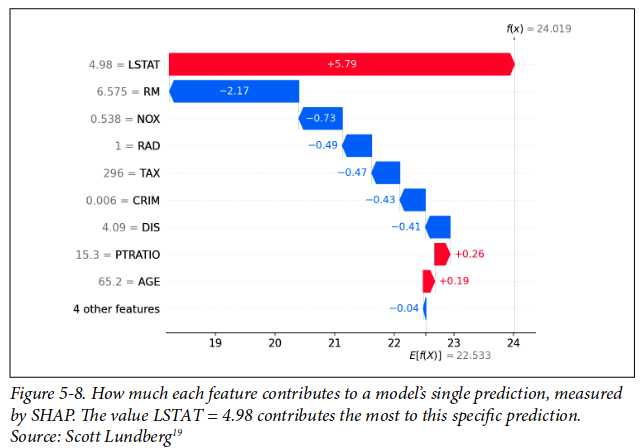
- No solo son √∫tiles para seleccionar las caracter√≠sticas adecuadas, sino que las t√©cnicas de feature importance tambi√©n sirven para la __interpretabilidad__, ya que te ayudan a comprender c√≥mo funcionan tus modelos internamente.

## 5. Bibliografia

1. Huyen, C. (2022). *Designing machine learning systems: An iterative process for production-ready applications*. O'Reilly Media.

2. Murphy, K. P. (2022). *Probabilistic machine learning: An introduction*. MIT Press.
